<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'>SPAM detection.</h1>
</div>

<strong>Content:</strong>

1. Load the Data.
    + Importing Libraries.
    + Loading the data.
2. Data Overview.
3. Using TfidfVectorizer.
3. Building a Vocabulary from scratch.
4. Using Scikit-learn to extract features from text data.
5. Building the Classifier.

The dataset use in this project can be found in this [link](https://www.kaggle.com/uciml/sms-spam-collection-dataset).
<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Load the Data</h2>
</div>

In this section you will:

- Import the libraries.
- Load the dataset.

### 1.1 Import Libraries

In [24]:
import re
import os

import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt

#to data split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

### 1.2 Loading the data.

In [6]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.dropna(axis = 1, inplace = True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns = {"v1":"label","v2":"text"}, inplace = True)
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Data Overview</h2>
</div>

In [10]:
df["word_count"] = df["text"].apply(lambda t:len(t))
df.head()

,label,text,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
df['word_count'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: word_count, dtype: float64

In [12]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

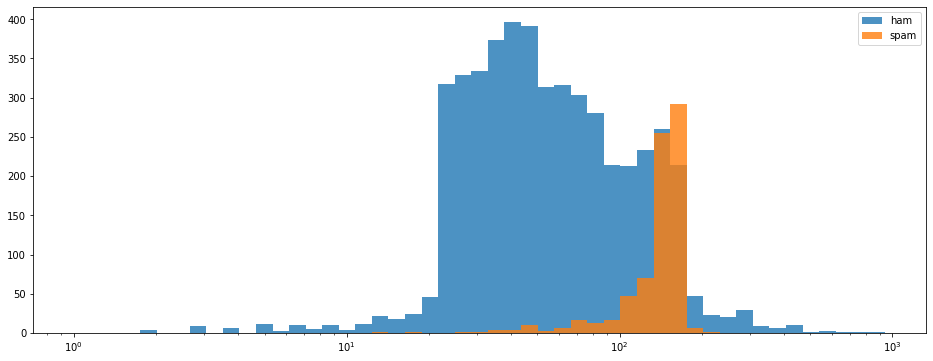

In [19]:
plt.figure(figsize=(16,6))
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['word_count'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['word_count'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

## write some conclusions

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3.Splitting the data</h2>
</div>



In [21]:
X_train, X_test, y_train, y_test = train_test_split(df["text"],df["label"], test_size=0.3 ,random_state = 42)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Using TfidVectorizer</h2>
</div>


In [25]:
text_classifier = Pipeline([
    ('tfidvectorizer',TfidfVectorizer()),
    ('LinearSVC',LinearSVC())
])

text_classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidvectorizer', TfidfVectorizer()),
                ('LinearSVC', LinearSVC())])

In [26]:
predictions = text_classifier.predict(X_test)
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1475
        spam       0.89      0.98      0.93       197

    accuracy                           0.98      1672
   macro avg       0.94      0.98      0.96      1672
weighted avg       0.98      0.98      0.98      1672



Text(0.5, 1.0, 'Confusion matrix')

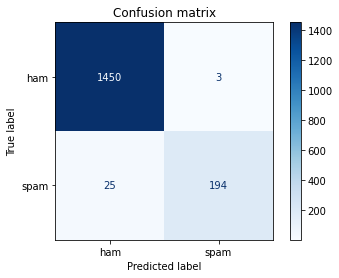

In [27]:
# Plot non-normalized confusion matrix
title = "Confusion matrix"
normalize = None

class_names = text_classifier.classes_

disp = plot_confusion_matrix(text_classifier, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize=normalize)
disp.ax_.set_title(title)

In [28]:
#general accuracy
print(accuracy_score(y_test,predictions))

0.9832535885167464
